#                                                      Projet 3

In [4]:
import pandas as pd 
import numpy as np 
import random as rd
import matplotlib.pyplot as plt

# 1. Apprentissage des paramètres d’un modèle à partir de données

### Question 1
Nous savon que $$P(X_t = S | X_{t-1} = S) = \frac{nbSS}{nb SS + nbSI + nbSR} = \frac{2}{2+1+0}= \frac{2}{3}$$

De même, nous pouvons obtenir la matrice comme:

$$\begin{matrix}
& S & I & R \\
S & \frac{2}{3} & \frac{1}{3} & 0 \\
I & 0 & \frac{5}{6} & \frac{1}{6} \\
R & 0 & 0 & 1 \\
\end{matrix}$$

### Question 1.1

In [5]:
data = np.loadtxt('data_exo1.txt')

In [6]:
def matricePrbTransition(data):
    ss, si, ii, ir, rr, rs = 0, 0, 0, 0, 0, 0
    for i in range(0, len(data)):
        l = len(data[i])
        for j in range(0, l-1):
            if(data[i][j] == 0 and data[i][j+1] == 0):
                ss+=1
            if(data[i][j] == 0 and data[i][j+1] == 1):
                si+=1
            if(data[i][j-1] == 1 and data[i][j] == 1):
                ii+=1
            if(data[i][j-1] == 1 and data[i][j] == 2):
                ir+=1
            if(data[i][j-1] == 2 and data[i][j] == 2):
                rr+=1
            if(data[i][j-1] == 2 and data[i][j] == 0):
                rs+=1
    return np.array([[ss/(ss + si), (si/(ss + si)), 0], 
                    [0, ii/(ii + ir), ir/(ii + ir)], 
                    [rs/(rs + rr), 0, rr/(rs + rr)]])

In [7]:
M_data = matricePrbTransition(data)
print(M_data)

[[0.93082918 0.06917082 0.        ]
 [0.         0.93519578 0.06480422]
 [0.04613722 0.         0.95386278]]


# 2. Description du premier modèle

### Question 1

$$\begin{matrix}
& S & I & R \\
S & 0.92 & 0.08 & 0 \\
I & 0 & 0.93 & 0.07 \\
R & 0 & 0 & 1 \\
\end{matrix}$$

In [8]:
A = np.array([[0.92,0.08,0],[0,0.93,0.07],[0,0,1]])

In [9]:
"""
Nous vérifions si la somme des probabilités pour chaque ligne de la matrice est égale à 1
"""
def verifieMatrice(m):
    for i in range(0,len(m)):
        sum = 0
        for j in range(0,len(m[0])):
            sum = sum + m[i][j]
        if not sum == 1:
            return False
    return True

In [10]:
verifieMatrice(M_data)

True

### Question 2
$\pi_0 = [0,9,0.1,0]$

## Distribution $\pi_t$

### Question 1

Au temps t = 1, on calcule $P(X_1) = \pi_0 * A $ 

Donc,

t=1 etre sain: $\pi_0 = S* P(X_1 = S| X_0 = S) = 0.9*0.92 = 0.828$

t=1 etre infecte: $\pi_0(S) * P(X_1 = I| X_0 = S) + \pi_0(I) * P(X_1 = I| X_0 = I) = 0.9*0.08 + 0.1 * 0.93 = 0.165$

t=1 etre gueri: $\pi_0(I) * P(X_1 = R| X_0 = I) = 0.1*0.07 = 0.007$

### Question 2

Par la question précédent, on peut obtenir $\pi_1 = [0.828,0.165,0.007]$

Donc,

t=2 etre sain: $\pi_1 = S* P(X_2 = S| X_1 = S) = 0.828*0.92 = 0.76176$

t=2 etre infecte: $\pi_1(S) * P(X_2 = I| X_1 = S) + \pi_1(I) * P(X_2 = I| X_1 = I) = 0.828*0.08 + 0.165 * 0.93 =0.21969$

t=2 etre gueri: $\pi_1(I) * P(X_2 = R| X_1 = I) + \pi_1(R) * P(X_2 = R| X_1 = R)= 0.165*0.07 + 0.007*1 = 0.01855$

### Question 3

In [11]:
"""
Entree: t est le temps, p0 est π0 , A est la matrice de transition
Retourne: pour chaque temps t, retourne la distribution théorique des effectifs dans chaque état
"""
def calculPi(t,p0,A):
    P_Sn, P_In, P_Rn = p0[0],p0[1],p0[2]
    P_Sn1, P_In1, P_Rn1 = p0[0],p0[1],p0[2]
    for i in range(1,t+1):
        P_Sn = P_Sn1 * A[0][0] + P_Rn1 * A[2][0]
        P_In = P_Sn1 * A[0][1] + P_In1 * A[1][1]
        P_Rn = P_In1 * A[1][2] + P_Rn1 * A[2][2]
        P_Sn1, P_In1, P_Rn1 = P_Sn, P_In, P_Rn
    return [P_Sn, P_In, P_Rn]

In [12]:
calculPi(200,[0.9,0.1,0],A)

[5.150008887922428e-08, 3.2180489871818777e-06, 0.9999967304509254]

### Question 4

In [13]:
def drawTheo(t, p0, A):

    sain, infecte, gueri, T = [], [], [], []
    
    for i in range(0,t):
        Pi=calculPi(i, p0, A)
        T.append(i)
        sain.append(Pi[0])
        infecte.append(Pi[1])
        gueri.append(Pi[2])   
    
    l1=plt.plot(T, sain,'b',label='etat S')
    l2=plt.plot(T, infecte,'y',label='etat I')
    l3=plt.plot(T, gueri,'g',label='etat R')
    plt.plot(T, sain,'b', T, infecte,'y', T, gueri, 'g')
    plt.title('Repartition theorique des effectifs')
    plt.xlabel('Day')
    plt.ylabel('Probabilité')
    plt.legend()
    plt.show()

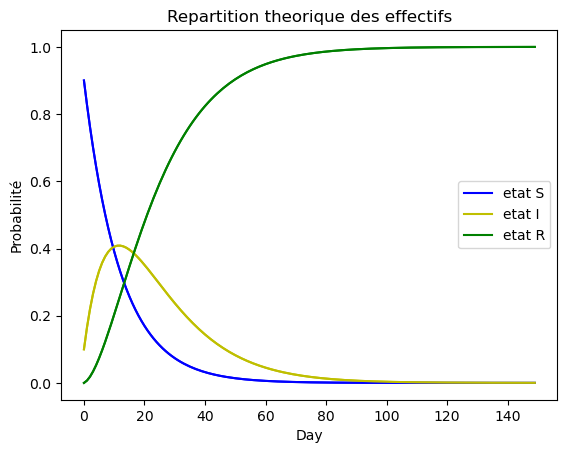

In [14]:
drawTheo(150,[0.9,0.1,0],A)

On peut voir que au tout début, la distribution de l'état est basée sur la distribution de probabilité initiale. Après un temps suffisamment long, l'état de chacun est dans un état de guéri et le nombre de personnes infectées et sain est fondamentalement de 0.

## Tirage aléatoire des états

In [15]:
def creatChaineMarkov(T, A, p0):
    chaine=[]
    prob=rd.uniform(0, 1)
    boolean = True
    
    if prob > p0[1]: #si prob > P_0(I), alors on initial l'etat est S, les etats suivant sont S ou I
        chaine.append(0)
        while(len(chaine) < T and boolean):
            prob=rd.uniform(0, 1)
            if prob < A[0][1]:
                chaine.append(1)
                boolean = False #si l'etat est transforme a I, alors on termine cette boucle, car etats suivants sont I ou R 
            else:
                chaine.append(0)
        boolean = True
    
    else: #si prob < P_0(I), alors on initial l'etat est I, suivant etats sont juste I ou R
        chaine.append(1)
    
    while(len(chaine) < T and boolean):
        prob=rd.uniform(0, 1)
        if prob < A[1][2]:
            chaine.append(2)
            boolean = False #si l'etat est transforme a R, alors on termine cette boucle, car etats suivants seulement R 
        else:
            chaine.append(1)
            
    #si l'etat est R, alors les etats suivants seulment R
    for i in range(len(chaine), T):
        chaine.append(2)
    
    return chaine

In [17]:
creatChaineMarkov(150,A,[0.9,0.1,0])

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

## Modélisation d’une population

### Question 1, 2

In [18]:
"""
Nous créons n chaînes de Markov de longueur "longueur", 
selon la distribution de probabilité initiale p0 et la matrice de transition A
"""
def C200Individu(longueur,n,p0,A):
    l = []
    for i in range(0,n):
        l.append(creatChaineMarkov(longueur,A,p0))
    return l

In [19]:
"""
Au temps t, on calcule combien de S, combien de I et combien de R sont dans la chaîne
chaine est une liste de chaînes de Markov
"""
def NbS_I_R(t,chaine):
    nb_S, nb_I, nb_R = 0,0,0
    for i in range(len(chaine)):
        if chaine[i][t] == 0:
            nb_S = nb_S+1
        elif chaine[i][t] == 1:
            nb_I = nb_I + 1
        else:
            nb_R = nb_R + 1
    return [nb_S,nb_I,nb_R]

In [20]:
def drawPourcentage(n,p0,longueur,A):
    sain, infecte, gueri, T = [], [], [], []
    chaine = C200Individu(longueur,n,p0,A)
    for i in range(0,longueur):
        T.append(i)
        sain.append(NbS_I_R(i,chaine)[0]/n)
        infecte.append(NbS_I_R(i,chaine)[1]/n)
        gueri.append(NbS_I_R(i,chaine)[2]/n)   
    

    l1=plt.plot(T, sain,'b',label="pourcantage d'individu sain")
    l2=plt.plot(T, infecte,'y',label="pourcantage d'individu infecte")
    l3=plt.plot(T, gueri,'g',label="pourcantage d'individu guéri")
    plt.plot(T, sain,'b', T, infecte,'y', T, gueri, 'g')
    title = 'Distribution observe sur une population de ' + str(n) + ' individus'
    plt.title(title)
    plt.xlabel('Day')
    plt.ylabel('probabilité')
    plt.legend()
    plt.show()
        

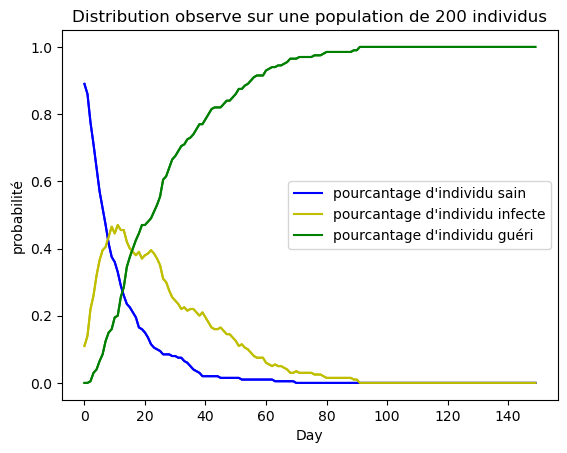

In [21]:
drawPourcentage(200,[0.9,0.1,0],150,A)

### Question 3

Quand t est assez grand, $P(x=S)$ tend vers 0, $P(x = I)$ tend vers 0, et $P(x = R )$ tend vers 1 

### Question 4

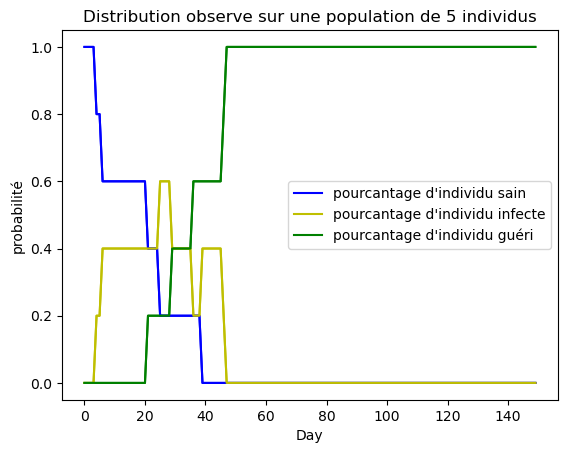

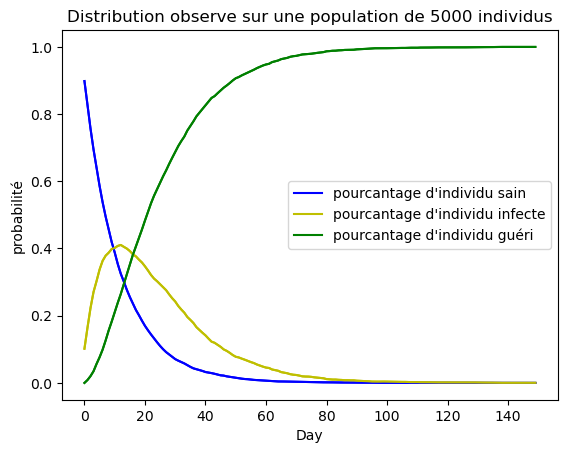

In [23]:
drawPourcentage(5,[0.9,0.1,0],150,A)
drawPourcentage(5000,[0.9,0.1,0],150,A)

## Longueur de l'infection

### Question 1 

In [24]:
"""
retourne la longueur moyenne de la sequence de I
"""
def lMoyenneI(longueur,n,p0,A):
    chaine  = C200Individu(longueur,n,p0,A)
    somme = 0
    for i in range(0,n):
        for j in chaine[i]:
            if j == 1: # infection
                somme = somme + 1
    return somme/n

In [26]:
lMoyenneI(150,200,[0.9,0.1,0],A)

14.465

### Question 2

In [27]:
def drawEstimationI(longueur,n,p0,A):
    chaine  = C200Individu(longueur,n,p0,A)
    d = {}
    for i in range(0,n):
        nb = 0
        for j in chaine[i]:
            if j == 1:
                nb = nb + 1
        
        if nb in d.keys():
            d[nb] = d[nb] + 1
        else:
            d[nb] = 1
    #data = len(l_longeurI)
    #coups = list(set(data))
    #plt.hist(list(d.keys()),bins=list(d.values()),rwidth=0.8)
    value = list(d.values())
    for k in range(len(value)):
        value[k] = value[k]/n
        
    plt.bar(d.keys(),value, width=0.5, color='g')
    plt.xlabel("longueurI")
    plt.ylabel("occurence")
    plt.show()

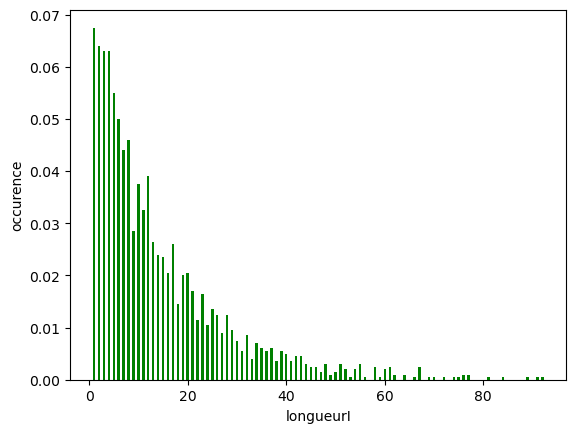

In [28]:
drawEstimationI(150,2000,[0.9,0.1,0],A)

### Question 3


Tout d'abord, la définition d'une loi géométrique est: Loi géométrique - cette loi mesure le temps d’attente jusqu’au premier succès d’une suite d’essais indépendants.

En appliquant ce cas, nous pouvons considérer la guérison de l'infection comme un succès, c.à.d quand I passe en R, c'est un premiser succès. Donc, pour calculer la longueur de la sequence de S et I, nous pouvons utiliser la loi géométrique pour calculer avec $G(p)$ où $p = P(IR)=0.07$. 

Lorsque la chaîne de Markov est suffisamment longue, nous pouvons penser que chaque individu sera infecté puis guéri, et la longueur de la sequence de S et I peut être approchée comme la longueur de la sequence de I, la longueur théorique de la sequence de I doit être proche de l'Espérance de la loi géométrique: $E = \frac{1}{p} =\frac{1}{0.07}  = 14.28$

### Question 4

In [29]:
"""On répétes apelle la fonction lMoyenneI nbfois fois, obtient nbfois résultats, et on calcule la moyenne des résultats"""
def comparerTheoEtEstimI(nbfois,longueur,n,p0,A):
    somme = 0
    for i in range(0,nbfois):
        somme = somme + lMoyenneI(150,n,p0,A)
        
    print('Estimation: ', somme/nbfois)
    print('Theorique: ', 14.28)

In [30]:
comparerTheoEtEstimI(100,150,200,[0.9,0.1,0],A)

Estimation:  14.26615
Theorique:  14.28


### Question 5

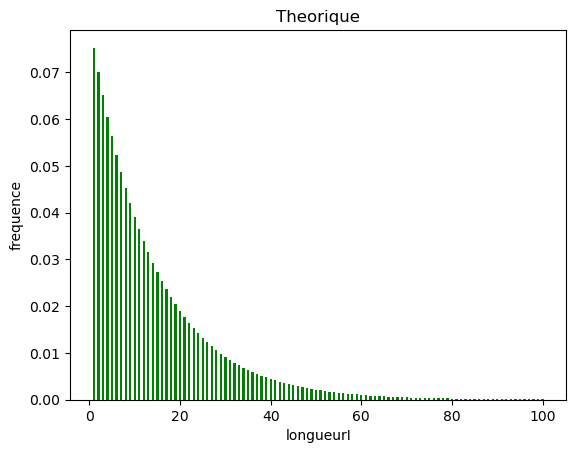

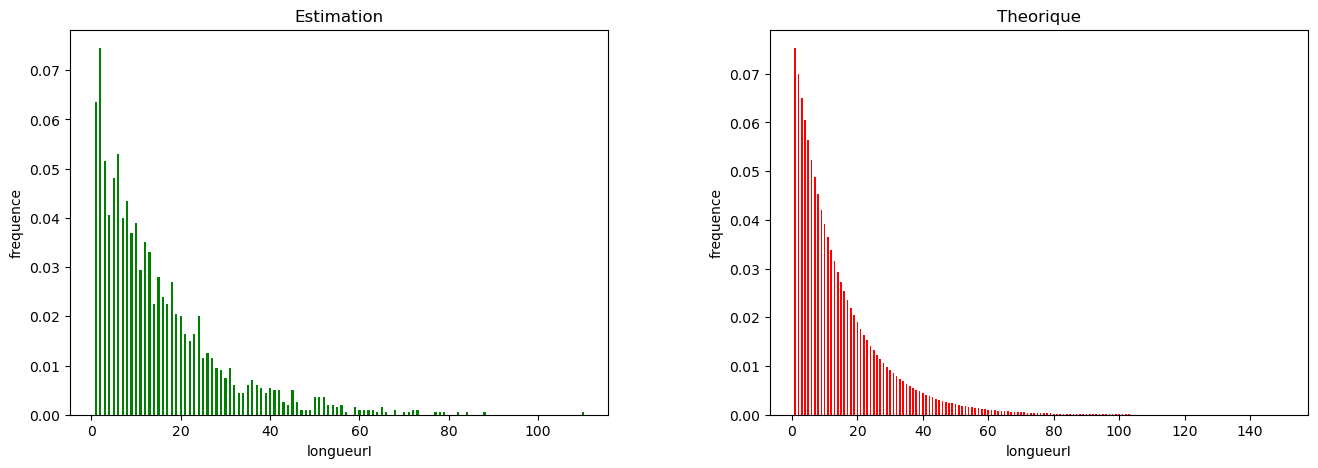

In [31]:
def drawTheoriqueI(longueur,p):
    d={}
    for i in range(longueur):
        d[i+1]=(1-p)** (i-1) * p
        
    plt.bar(d.keys(),d.values(), width=0.5, color='g')
    plt.xlabel("longueurI")
    plt.ylabel("frequence")
    plt.title('Theorique')
    plt.show()
    
    
drawTheoriqueI(100, 0.07)

def drawTheoriqueIEtEstimationI(longueur,n,p0,A,pI_R):
    chaine  = C200Individu(longueur,n,p0,A)
    d = {}
    for i in range(0,n):
        nb = 0
        for j in chaine[i]:
            if j == 1:
                nb = nb + 1
        
        if nb in d.keys():
            d[nb] = d[nb] + 1
        else:
            d[nb] = 1
    value = list(d.values())
    for k in range(len(value)):
        value[k] = value[k]/n
        
    d2={}
    for i in range(longueur):
        d2[i+1]=(1-pI_R)** (i-1) * pI_R
        
    fig = plt.figure(figsize=(25, 5))
    axs = []
    axs.append(fig.add_subplot(131))
    axs[0].bar(d.keys(),value, width=0.5, color='g')
    axs[0].set_xlabel('longueurI')
    axs[0].set_ylabel('frequence')
    axs[0].set_title('Estimation')
    
    axs.append(fig.add_subplot(132))
    axs[1].bar(d2.keys(),d2.values(), width=0.5, color='r')
    axs[1].set_xlabel('longueurI')
    axs[1].set_ylabel('frequence')
    axs[1].set_title('Theorique')
                  
    plt.subplots_adjust(hspace=0.1, wspace=0.3)
    plt.show()
drawTheoriqueIEtEstimationI(150,2000,[0.9,0.1,0],A,0.07)

## Petites modifications autour de ce premier modèle

### Question 1: modifier la taille de la population

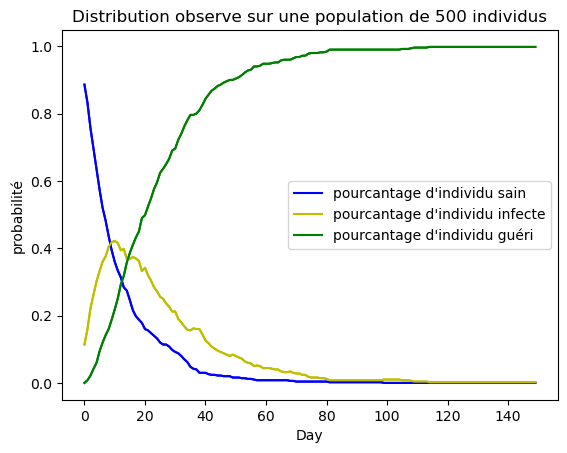

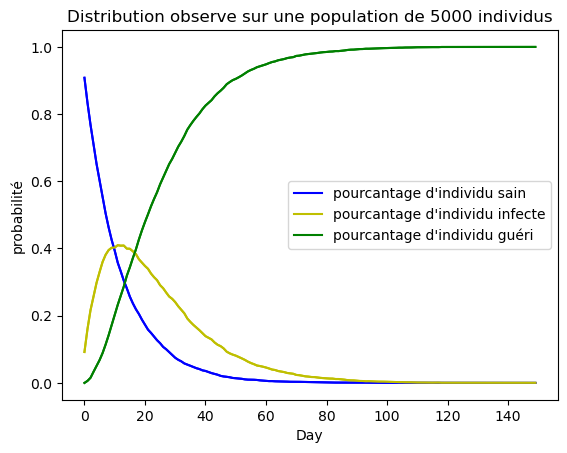

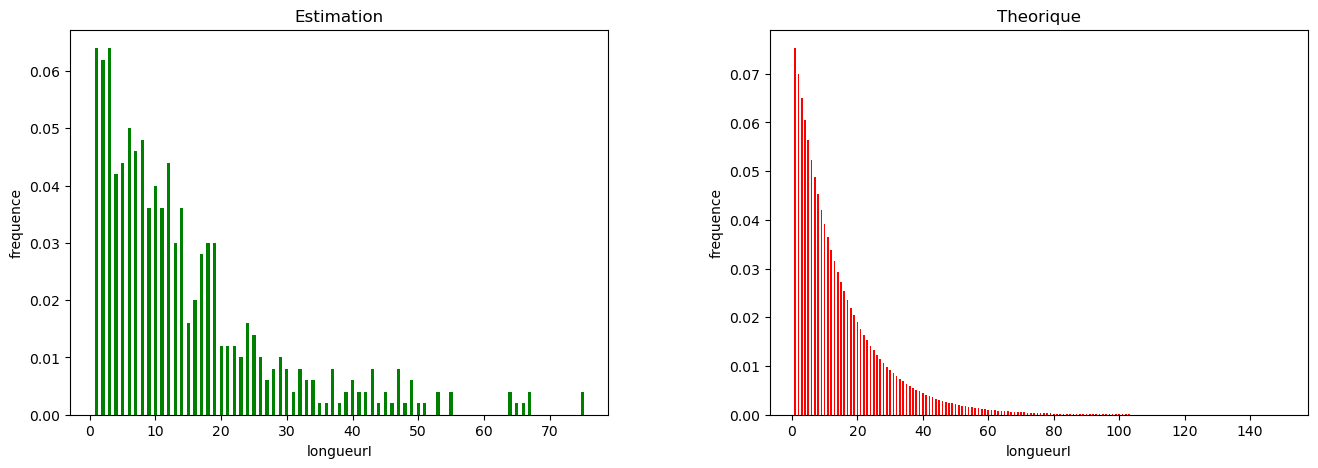

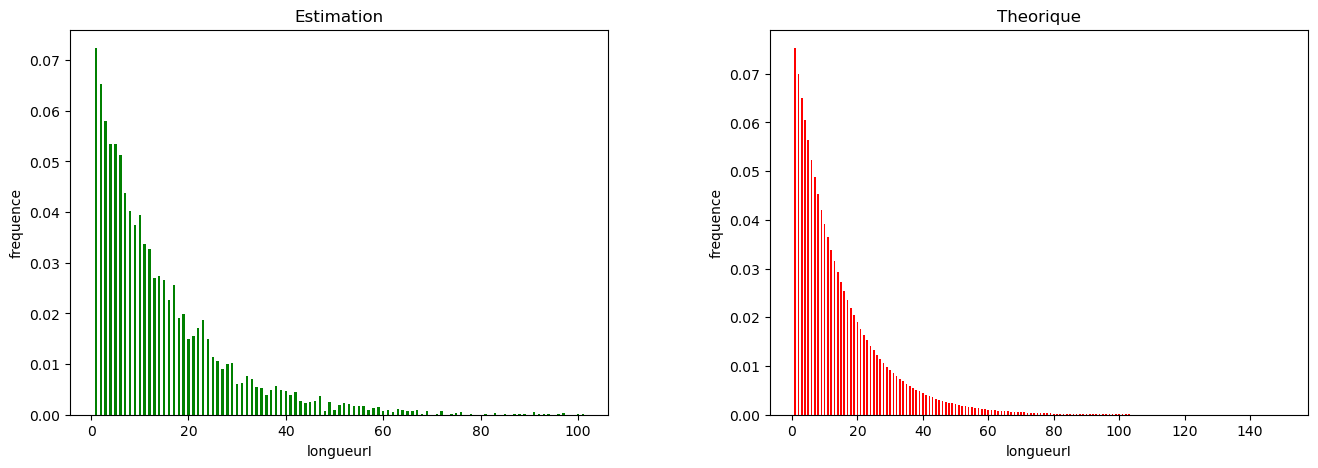

In [32]:
drawPourcentage(500,[0.9,0.1,0],150,A)
drawPourcentage(5000,[0.9,0.1,0],150,A)
drawTheoriqueIEtEstimationI(150,500,[0.9,0.1,0],A,0.07)
drawTheoriqueIEtEstimationI(150,5000,[0.9,0.1,0],A,0.07)

Lorsque nous modifions la taille de la population, nous pouvons constater que quand la taille de la population est petite, l'échelle de données obtenue n'est pas grande, elle n'est donc pas très précise, mais lorsque l'échelle est suffisamment grande, comme 5000, elle est très proche de la valeur théorique que nous avons obtenue, Les données sont également plus précises.

### Question 2: modifier la distribution de probabilité initiale

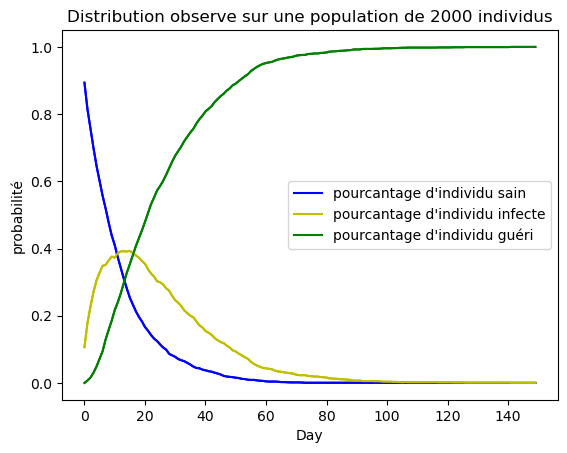

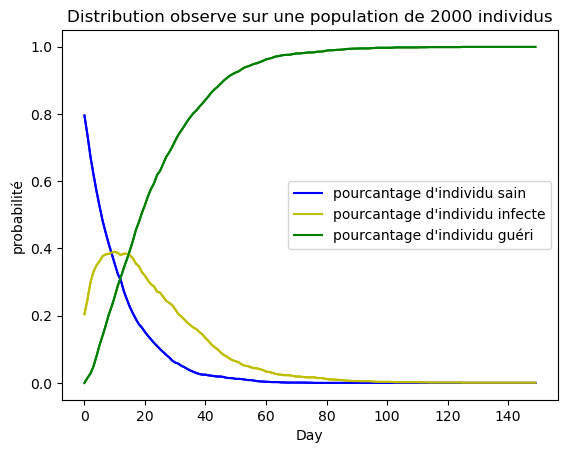

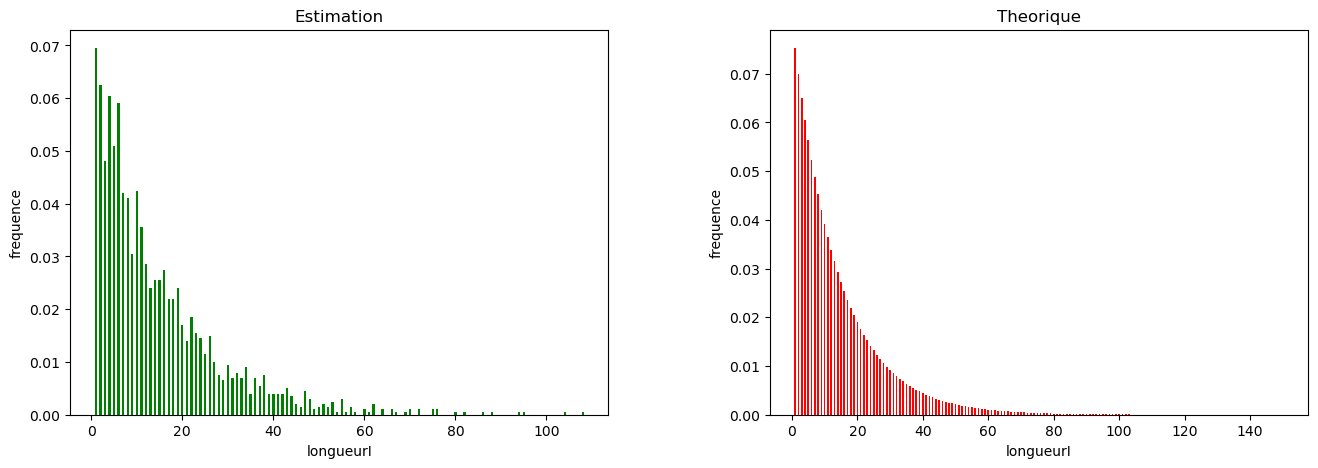

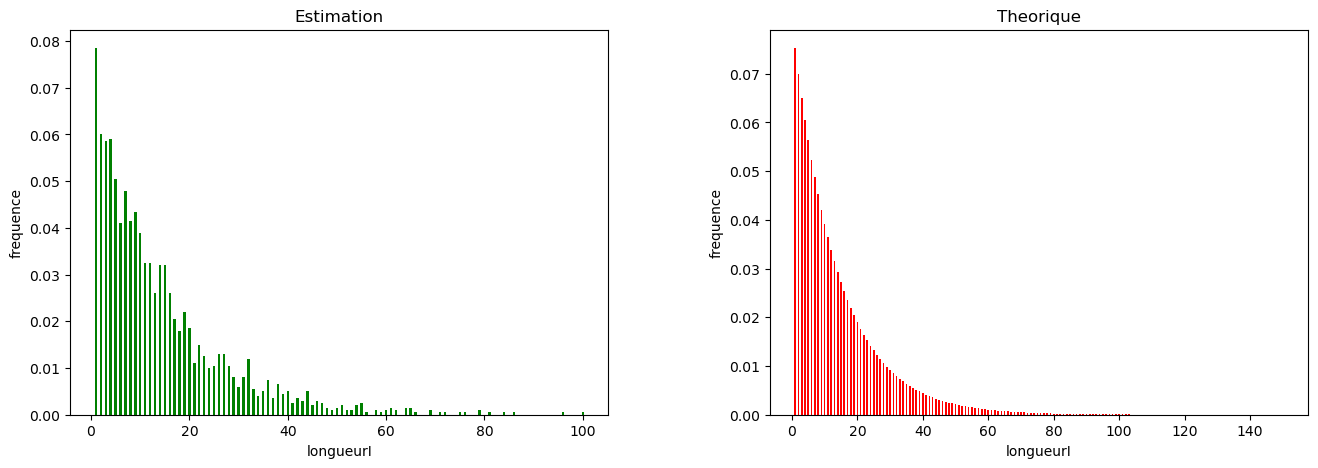

In [33]:
drawPourcentage(2000,[0.9,0.1,0],150,A)
drawPourcentage(2000,[0.8,0.2,0],150,A)
drawTheoriqueIEtEstimationI(150,2000,[0.9,0.1,0],A,0.07)
drawTheoriqueIEtEstimationI(150,2000,[0.8,0.2,0],A,0.07)

Lorsque nous modifions la distribution de probabilité initiale, nous constatons qu'au début, le nombre de personnes infectées et sain est distribué selon la distribution de probabilité initiale, qui est différente, mais à la fin, le nombre de personnes sain et infectées est également proche à 0, et le nombre de guéri approximatif de la taille totale de l'échantillon.

### Question 3: modifier les probabilités de transition

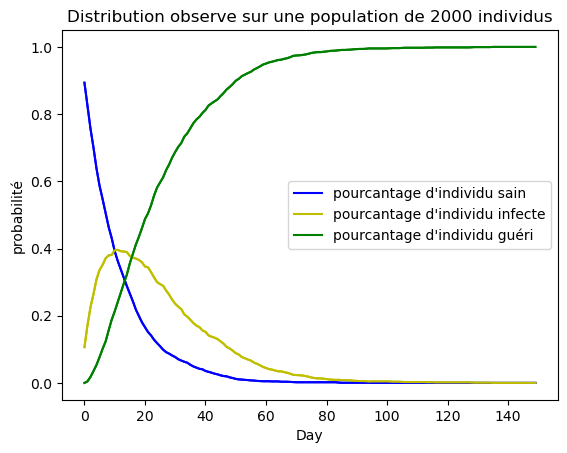

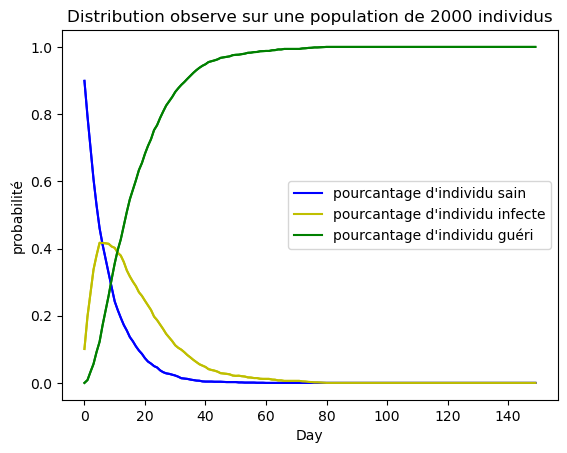

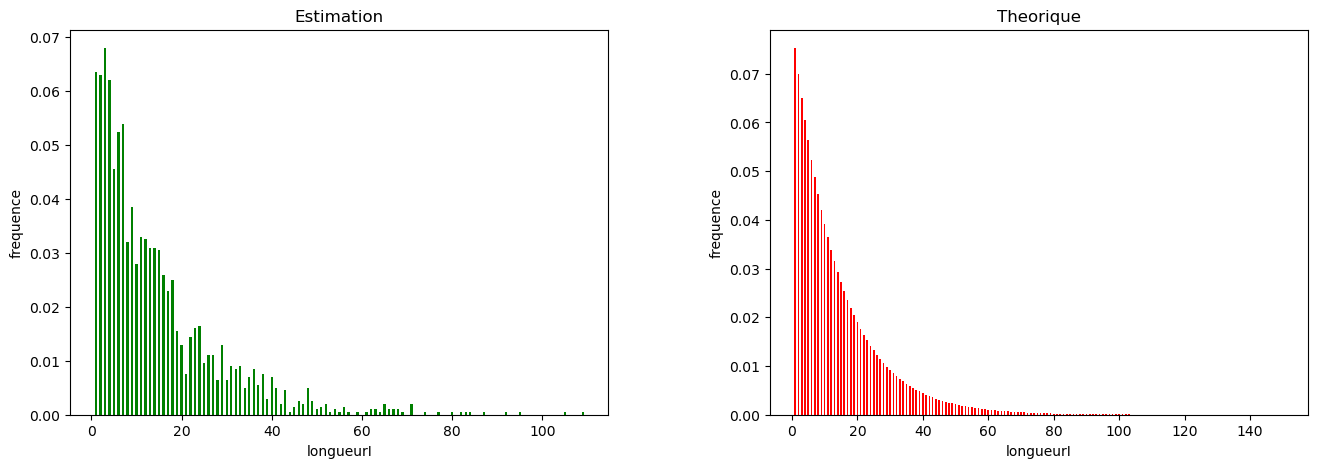

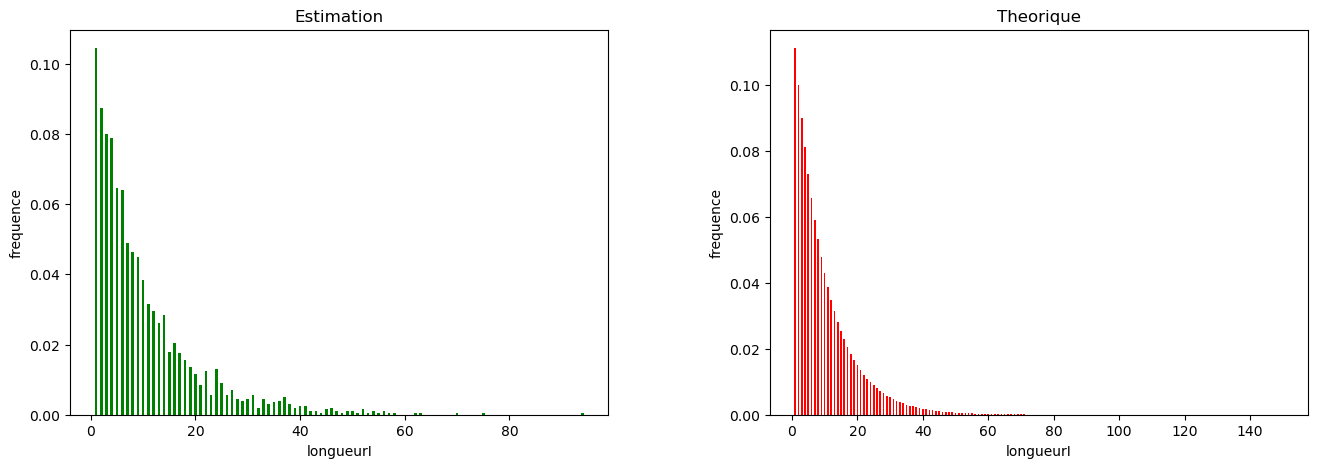

In [34]:
A_1 = np.array([[0.88,0.12,0],[0,0.90,0.10],[0,0,1]])
drawPourcentage(2000,[0.9,0.1,0],150,A)
drawPourcentage(2000,[0.9,0.1,0],150,A_1)
drawTheoriqueIEtEstimationI(150,2000,[0.9,0.1,0],A,0.07)
drawTheoriqueIEtEstimationI(150,2000,[0.9,0.1,0],A_1,0.10)

Lorsque nous modifions la probabilité de transition, la longueur de la sequence de I changera, par exemple, lorsque $P(IR) = 0.1$, la longueur théorique devient 10 et la longueur estimée de I simulée est également d'environ 10

# 3. Description du second modèle

## Analyse du modèle

### Question 1

Oui, il peut modélisé par une chaîne de Markov, parce que la probabilité de l'état actuel n'est liée qu'à l'état précédent. Et c'est un processus statistique, les états finis, lq probabilité de markov d'être 1.

### Question 2

$$\begin{matrix}
& S & I & R \\
S & 0.92 & 0.08 & 0 \\
I & 0 & 0.93 & 0.07 \\
R & 0.02 & 0 & 0.98 \\
\end{matrix}$$

In [35]:
A2 = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.02,0,0.98]])

### Question 3
Elle est apériodique et irréductible. 

### Question 4

A correspond a A2, la nouvelle matrice de transition. Elle est stochastique.


In [36]:
A2*A2 # A x A

array([[8.464e-01, 6.400e-03, 0.000e+00],
       [0.000e+00, 8.649e-01, 4.900e-03],
       [4.000e-04, 0.000e+00, 9.604e-01]])

In [37]:
A2*A2*A2 # A x A x A

array([[7.78688e-01, 5.12000e-04, 0.00000e+00],
       [0.00000e+00, 8.04357e-01, 3.43000e-04],
       [8.00000e-06, 0.00000e+00, 9.41192e-01]])

In [38]:
A2*A2*A2*A2 # A x A x A x A

array([[7.1639296e-01, 4.0960000e-05, 0.0000000e+00],
       [0.0000000e+00, 7.4805201e-01, 2.4010000e-05],
       [1.6000000e-07, 0.0000000e+00, 9.2236816e-01]])

### Question 5, 6, 7

In [39]:
"""
Entree: t est le temps, p0 est π0 , A est la matrice de transition
Retourne: pour chaque temps t, retourne la distribution théorique des effectifs dans chaque état
"""
def calculPi2(t,p0,A):
    P_Sn, P_In, P_Rn = p0[0],p0[1],p0[2]
    P_Sn1, P_In1, P_Rn1 = p0[0],p0[1],p0[2]
    for i in range(1,t+1):
        P_Sn = P_Sn1 * A[0][0] + P_Rn1 * A[2][0]
        P_In = P_Sn1 * A[0][1] + P_In1 * A[1][1]
        P_Rn = P_In1 * A[1][2] + P_Rn1 * A[2][2]
        P_Sn1, P_In1, P_Rn1 = P_Sn, P_In, P_Rn
    return [P_Sn, P_In, P_Rn]

In [40]:
calculPi2(1000,[0.9,0.1,0],A2) # trouver pi*

[0.16279069767441873, 0.18604651162790725, 0.6511627906976757]

In [41]:
def creatChaineMarkov2(T, A, p0):
    chaine=[4]
    prob=rd.uniform(0, 1)
    boolean2 = True
    
    while (len(chaine) < T+1):
        if prob > p0[1] or chaine.pop() == 0:  # si prob > P_0(I), alors on initial l'etat est S, les etats suivant sont S ou I
            chaine.append(0)
            while (len(chaine) < T+1 and boolean2):
                prob = rd.uniform(0, 1)
                if prob <= A[0][1]:
                    chaine.append(1)
                    boolean2 = False  # si l'etat est transforme a I, alors on termine cette boucle, car etats suivants sont I ou R
                else:
                    chaine.append(0)
            boolean2 = True

        else:  # si prob < P_0(I), alors on initial l'etat est I, suivant etats sont juste I ou R
            chaine.append(1)
            
        while (len(chaine) < T+1 and boolean2):
            prob = rd.uniform(0, 1)
            if prob <= A[1][2]:
                chaine.append(2)
                boolean2 = False  # si l'etat est transforme a R, alors on termine cette boucle, car etats suivants seulement R
            else:
                chaine.append(1)
                
        boolean2 = True
        # si l'etat est R, alors les etats suivants sont R ou S
        while (len(chaine) < T+1 and boolean2):
            prob = rd.uniform(0, 1)
            if prob <= A[2][0]:
                chaine.append(0)
                boolean2 = False # si l'etat est transforme a S, alors on retourne le debut
            else:
                chaine.append(2)
                
        boolean2 = True
    
    return chaine[1:]


"""
Nous créons n chaînes de Markov de longueur "longueur", 
selon la distribution de probabilité initiale p0 et la matrice de transition A
"""

def C200Individu2(longueur,n,p0,A):
    l = []
    for i in range(0,n):
        l.append(creatChaineMarkov2(longueur,A,p0))
    return l


In [42]:
def drawTheoEtPourcentage(n,p0,longueur,A):
    
    sain, infecte, gueri, T = [], [], [], []
    
    for i in range(0,longueur):
        Pi=calculPi2(i, p0, A)
        T.append(i)
        sain.append(Pi[0])
        infecte.append(Pi[1])
        gueri.append(Pi[2])   
        
    sain2, infecte2, gueri2, T2 = [], [], [], []
    chaine = C200Individu2(longueur,n,p0,A)
    for i in range(0,longueur):
        T2.append(i)
        sain2.append(NbS_I_R(i,chaine)[0]/n)
        infecte2.append(NbS_I_R(i,chaine)[1]/n)
        gueri2.append(NbS_I_R(i,chaine)[2]/n)   
    

    fig = plt.figure(figsize=(25, 5))
    axs = []
    axs.append(fig.add_subplot(131))
    axs[0].plot(T, sain,'b',label='etat S')
    axs[0].plot(T, infecte,'y',label='etat I')
    axs[0].plot(T, gueri,'g',label='etat R')
    axs[0].plot(T, sain,'b', T, infecte,'y', T, gueri, 'g')
    axs[0].set_xlabel('Day')
    axs[0].set_ylabel('probabilité')
    axs[0].set_title('Repartition theorique des effectifs')
    axs[0].legend()

    axs.append(fig.add_subplot(132))
    axs[1].plot(T2, sain2,'b',label="pourcantage d'individu sain")
    axs[1].plot(T2, infecte2,'y',label="pourcantage d'individu infecte")
    axs[1].plot(T2, gueri2,'g',label="pourcantage d'individu guéri")
    axs[1].plot(T2, sain2,'b', T2, infecte2,'y', T2, gueri2, 'g')
    title = 'Distribution observe sur une population de ' + str(n) + ' individus'
    axs[1].set_xlabel('Day')
    axs[1].set_ylabel('probabilité')
    axs[1].set_title(title)
    axs[1].legend()
    
                     
    plt.subplots_adjust(hspace=0.1, wspace=0.3)
    plt.show()

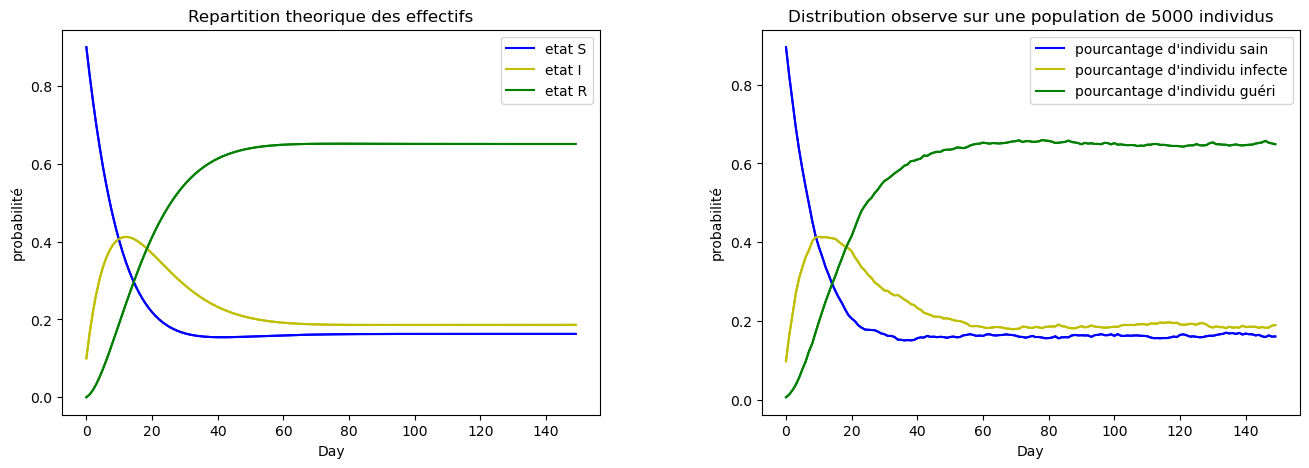

In [43]:
drawTheoEtPourcentage(5000,[0.9,0.1,0],150,A2)

#### Commenter:

Nous constatons qu'au début, le nombre de personnes infectées et sain est distribué selon la distribution de probabilité initiale $[0.9,0.1,0]$, mais à la fin, le pourcentage de personnes sain et infectées est également proche à 0.2, et le pourcentage de guéri est proche à 0.6 .

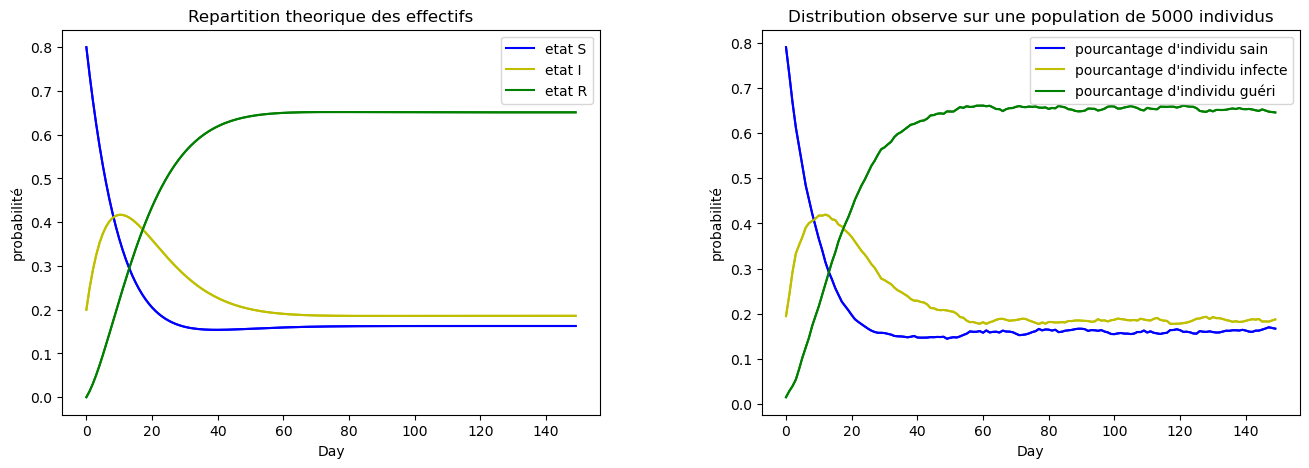

In [44]:
drawTheoEtPourcentage(5000,[0.8,0.2,0],150,A2)

#### Commenter :

Nous constatons qu'au début, le nombre de personnes infectées et sain est distribué selon la distribution de probabilité initiale $[0.8,0.2,0]$, mais à la fin, le pourcentage de personnes sain et infectées est également proche à 0.2, et le pourcentage de guéri est proche à 0.6 .

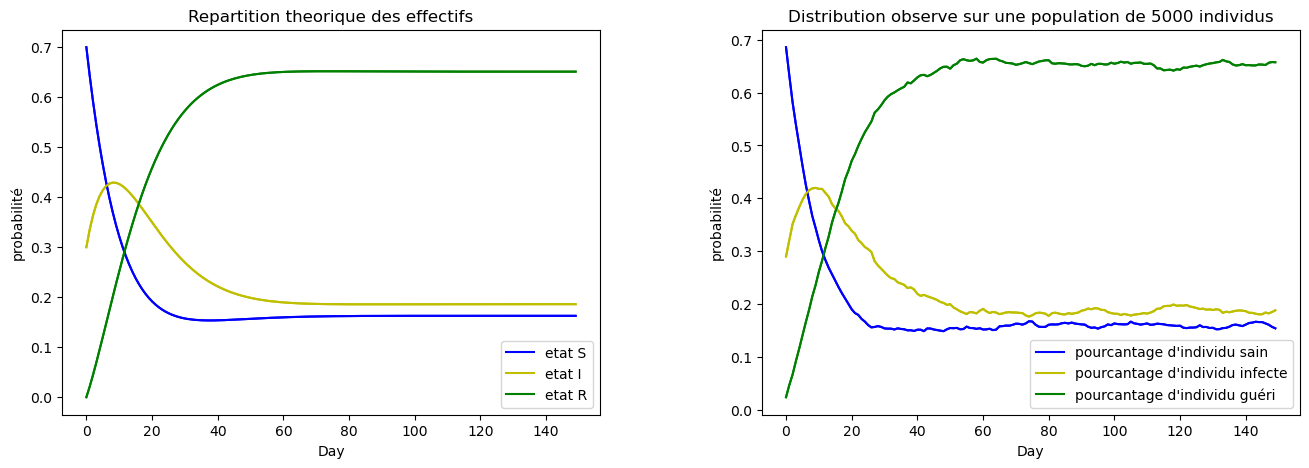

In [45]:
drawTheoEtPourcentage(5000,[0.7,0.3,0],150,A2)

#### Commenter:

Nous constatons qu'au début, le nombre de personnes infectées et sain est distribué selon la distribution de probabilité initiale $[0.7,0.3,0]$, mais à la fin, le pourcentage de personnes sain et infectées est également proche à 0.2, et le pourcentage de guéri est proche à 0.6 .

**Selon différentes distributions de probabilité initiales, les résultats finaux que nous obtenons sont similaires : lorsque le temps est suffisamment long, la proportion de personnes saines, infectées et guéries est d'environ 0.2, 0.2, 0.6.**

## Longueur de l’immunité

### Question 1

In [46]:
"""
retourne la longueur moyenne de la sequence de R
"""
def lMoyenneR(longueur,n,p0,A):
    chaine  = C200Individu2(longueur,n,p0,A) # Créer n chaînes de Markov de longueur "longueur" 
    somme = 0
    for i in range(0,n):
        for j in chaine[i]:
            if j == 2: # R
                somme = somme + 1
    return somme/n

#lMoyenneR(150,200,[0.9,0.1,0],A2)

### Question 2

On sait que la nature des états de cette chaîne de Markov est irréductible; apériodique, à état fini => récurrente positive.

Donc on a $\pi^* = [0.16279069767441873, 0.18604651162790725, 0.6511627906976757]$,

alors la longueur théorique d’une séquence de R est: longueur * 0.6511627906976757, 

si on choisit la longueur est 150, la longueur théorique d’une séquence de R est $150 * 0.6511627906976757 = 97.67441860465135$

In [47]:
"""On répétes apelle la fonction lMoyenneI nbfois fois, obtient nbfois résultats, et on calcule la moyenne des résultats"""
def comparerTheoEtEstimR(nbfois,longueur,n,p0,A):
    somme = 0
    for i in range(0,nbfois):
        somme = somme + lMoyenneR(150,n,p0,A)
        
    print('Estimation: ', somme/nbfois)
    print('Theorique: ', 97.67441860465135)

comparerTheoEtEstimR(500,150,200,[0.9,0.1,0],A2)

Estimation:  85.70477000000002
Theorique:  97.67441860465135


### Question 3

In [48]:
def drawTheoEtEstimR(n,p0,longueur,A):
    
    chaine  = C200Individu2(longueur,n,p0,A)
    d = {}
    for i in range(0,n):
        nb = 0
        for j in chaine[i]:
            if j == 2:
                nb = nb + 1
        
        if nb in d.keys():
            d[nb] = d[nb] + 1
        else:
            d[nb] = 1
    value = list(d.values())
    for k in range(len(value)):
        value[k] = value[k]/n

    d2={}
    for i in range(longueur):
        if int(calculPi2(i,[0.9,0.1,0],A2)[2] * 150) in d2.keys():
            d2[int(calculPi2(i,[0.9,0.1,0],A2)[2] * 150)]= d2[int(calculPi2(i,[0.9,0.1,0],A2)[2] * 150)]+1
        else:
            d2[int(calculPi2(i,[0.9,0.1,0],A2)[2] * 150)] = 1
    value2 = list(d2.values())
    for k in range(len(value2)):
        value2[k] = value2[k]/n

    """
    d2 = {}
    for k in range(longueur):
        d2[k] = calculPi2(k,[0.9,0.1,0],A2)[2]
    """
    
    fig = plt.figure(figsize=(25, 5))
    axs = []
    axs.append(fig.add_subplot(131))
    axs[0].bar(d.keys(),value, width=0.5, color='g')
    axs[0].set_xlabel('longueurR')
    axs[0].set_ylabel('frequence')
    axs[0].set_title('Estimation')
    
    axs.append(fig.add_subplot(132))
    axs[1].bar(d2.keys(),value2, width=0.5, color='r')
    axs[1].set_xlabel('longueurR')
    axs[1].set_ylabel('frequence')
    axs[1].set_title('Theorique')
                  
    plt.subplots_adjust(hspace=0.1, wspace=0.3)
    plt.show()

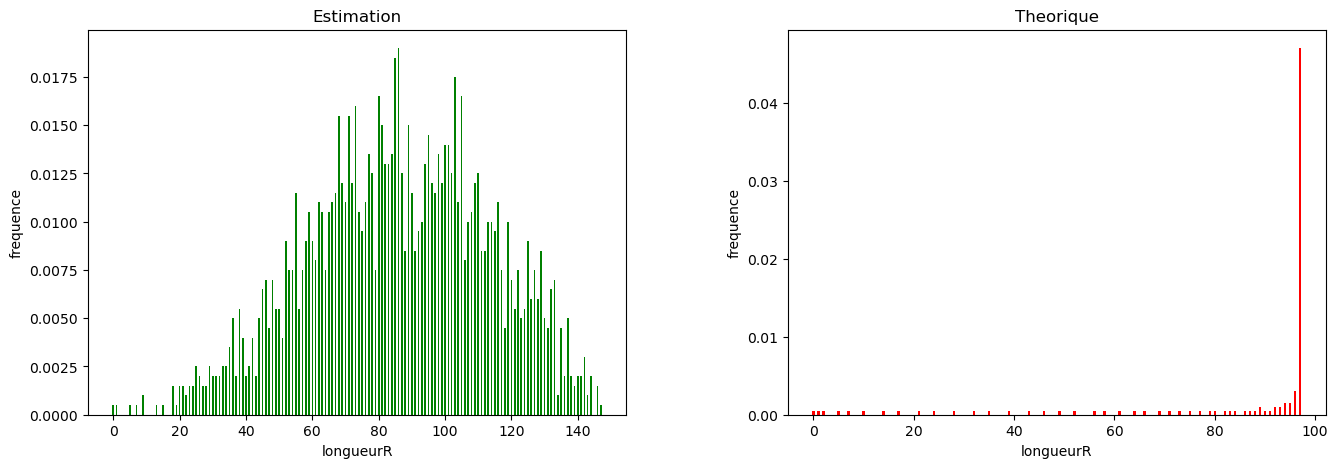

In [49]:
drawTheoEtEstimR(2000,[0.9,0.1,0],150,A2)

## Modifier le modèle

### Question 1:  changer la probabilité pour un individu sain de devenir infecté

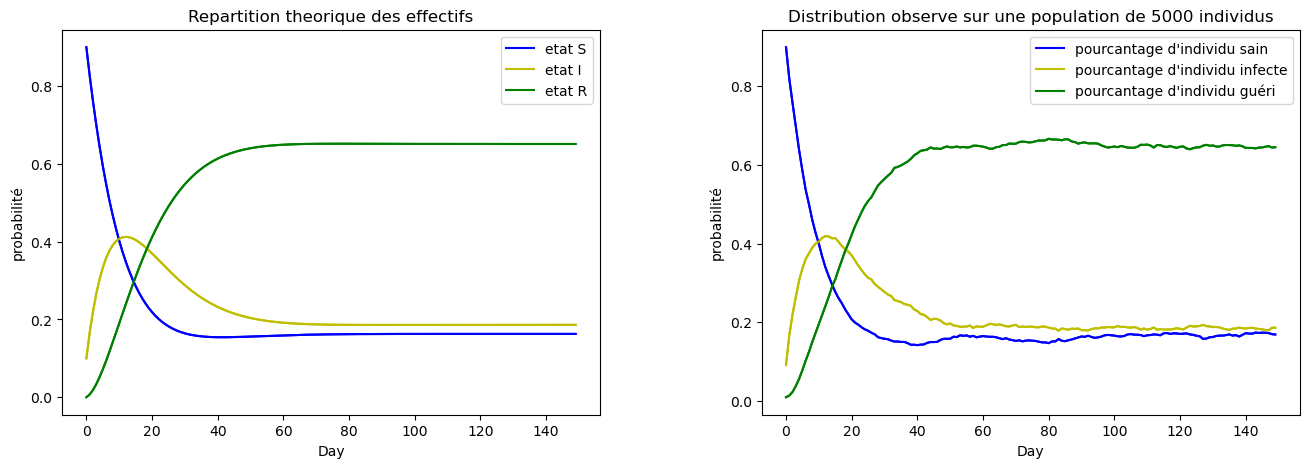

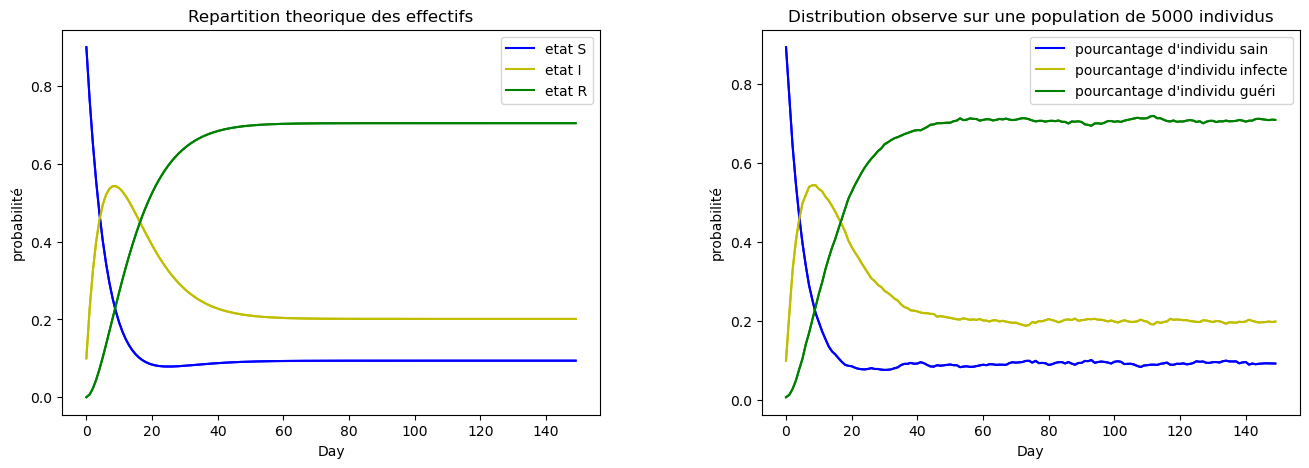

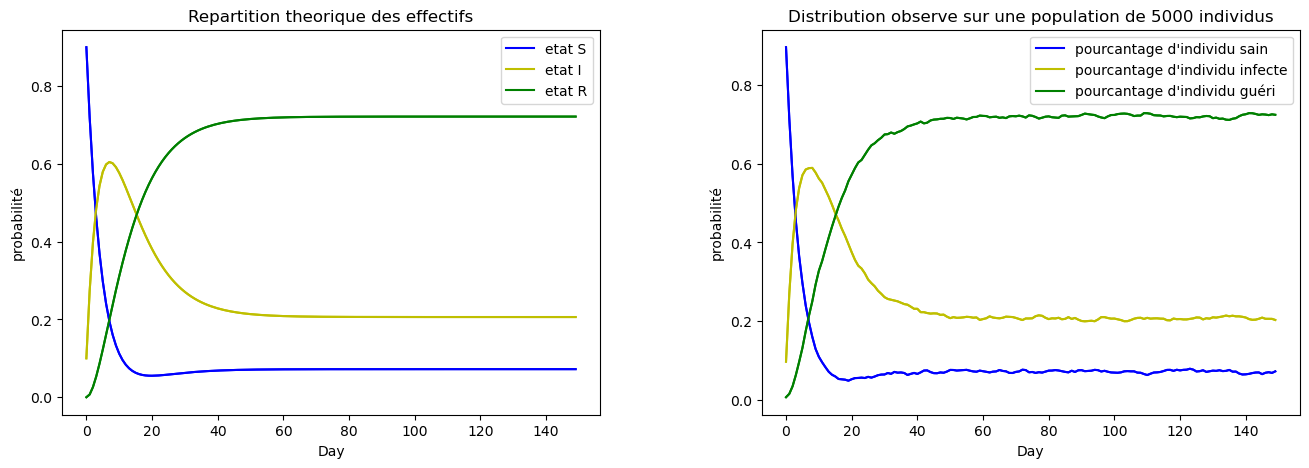

In [50]:
A2_1 = np.array([[0.85,0.15,0],[0,0.93,0.07],[0.02,0,0.98]])
A2_2 = np.array([[0.8,0.2,0],[0,0.93,0.07],[0.02,0,0.98]])
drawTheoEtPourcentage(5000,[0.9,0.1,0],150,A2)
drawTheoEtPourcentage(5000,[0.9,0.1,0],150,A2_1)
drawTheoEtPourcentage(5000,[0.9,0.1,0],150,A2_2)

Lorsque nous changeons la probabilité qu'un individu sain de devenir infecté, nous constatons qu'au début du pic d'infection, le pic augmentera et le temps d'infection sera plus rapide, et à la fin, la proportion de personnes sains, infectées et guéries sera également changer, la proportion de personnes sains a diminué environ à 0.1, et la proportion de personnes guéries a augmenté environ à 0.7.

### Question 2:  changer probabilité pour un individu guéri de redevenir sain

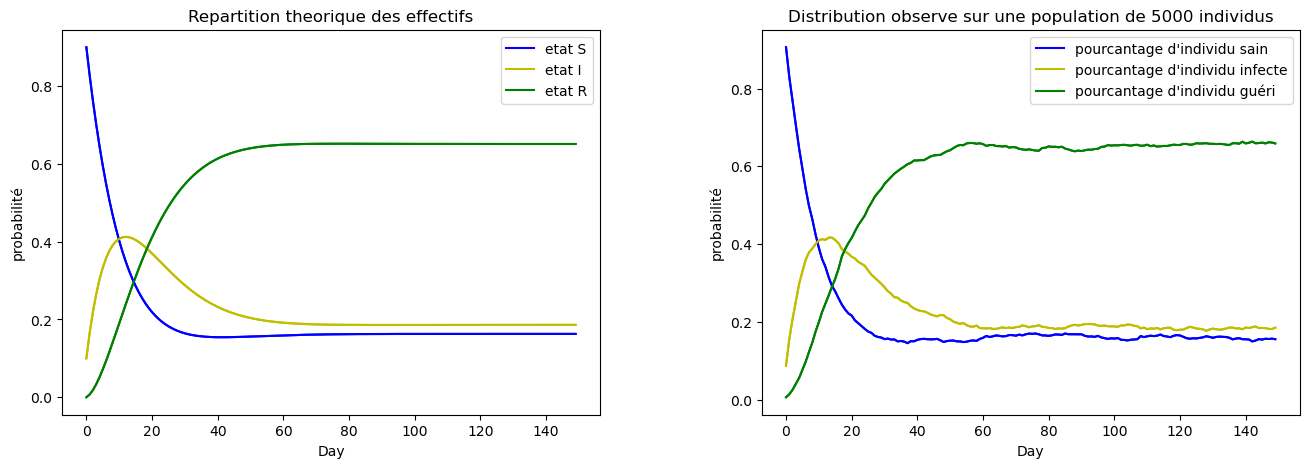

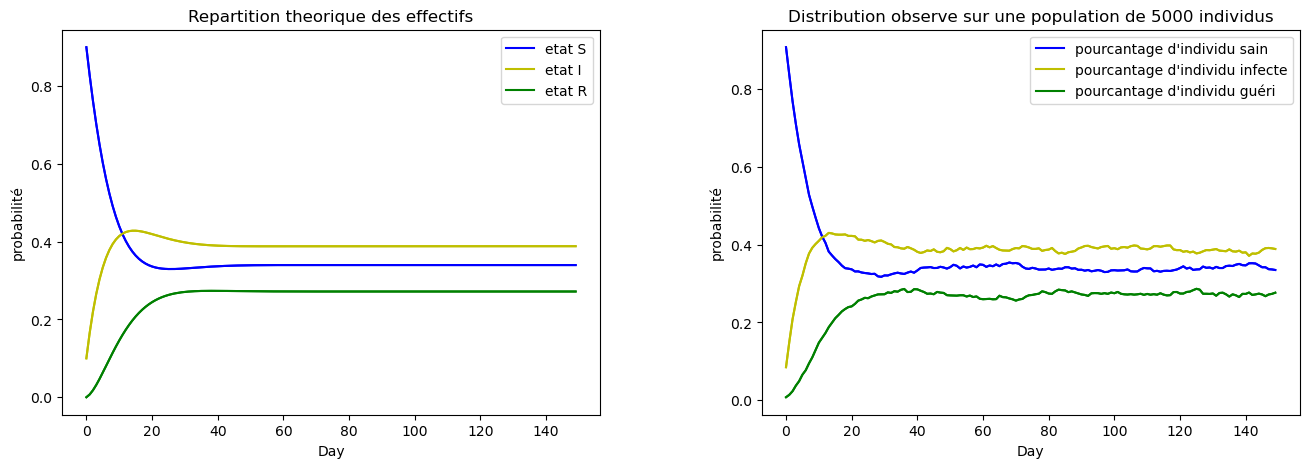

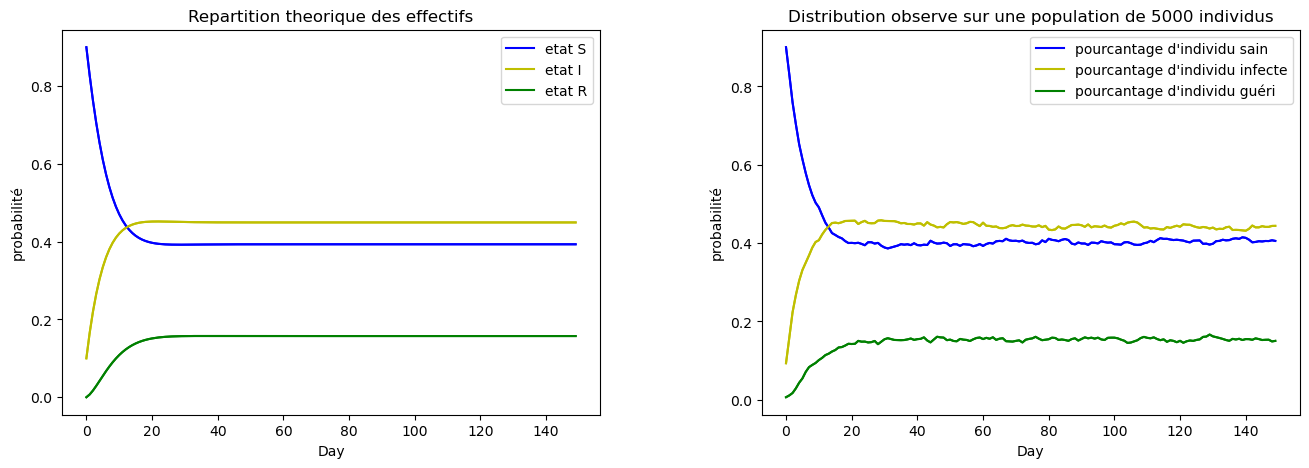

In [51]:
A2_3 = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.1,0,0.9]])
A2_4 = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.2,0,0.8]])
drawTheoEtPourcentage(5000,[0.9,0.1,0],150,A2)
drawTheoEtPourcentage(5000,[0.9,0.1,0],150,A2_3)
drawTheoEtPourcentage(5000,[0.9,0.1,0],150,A2_4)

Lorsque nous changeons la probabilité qu'un individu guéri redevienne sain, nous constatons que l'évolution de l'épidémie a beaucoup changé. Premièrement, la proportion de sains, la proportion de infectés et la proportion de guéris tend à être stable à environ 20 jours, et essentiellement après cela ne change plus. Deuxièmement, la proportion de guérisons a considérablement diminué et la proportion de personnes sains et infectées a augmenté beaucoup.

# 4. Confinement

In [52]:
"""
Entree: etat est l'etat actuellement ,
        longueur est la longueur de chaine de markov qu'on a besoin de créer
        A = np.array([[1,0,0],[0,0.93,0.07],[0.02,0,0.98]])
Return: une chaine de markov crée en période de confinement
"""
def confinementIndividu(etat,longueur,A):
    boolean2 = True
    chaine = []
    
    if etat == 0:
        for i in range(longueur):
            chaine.append(0)
    else:
        while (len(chaine) < longueur):
            if etat == 1:
                while (len(chaine) < longueur and boolean2):
                    prob = rd.uniform(0, 1)
                    if prob <= A[1][2]:
                        chaine.append(2)
                        boolean2 = False  # si l'etat est transforme a R, alors on termine cette boucle, car etats suivants seulement R
                    else:
                        chaine.append(1)
                        
                boolean2 = True
                # si l'etat est R, alors les etats suivants sont R ou S
                while (len(chaine) < longueur and boolean2):
                    prob = rd.uniform(0, 1)
                    if prob <= A[2][0]:
                        for j in range(longueur - len(chaine)):
                            chaine.append(0)# si l'etat est transforme a S, alors les etats suivants sont juste S
                    else:
                        chaine.append(2)
                        
            else: #l'etat initiale est R
                while (len(chaine) < longueur):
                    prob = rd.uniform(0, 1)
                    if prob <= A[2][0]:
                        for j in range(longueur - len(chaine)):
                            chaine.append(0)# si l'etat est transforme a S, alors les etats suivants sont juste S
                    else:
                        chaine.append(2)
    
    return chaine
#confinementIndividu(2,50,np.array([[1,0,0],[0,0.93,0.07],[0.02,0,0.98]]))

"""
Entree: etat est l'etat actuellement ,
        longueur est la longueur de chaine de markov qu'on a besoin de créer
        A =  la matrice de transition A2
Return: une chaine de markov crée en période de non-confinement
"""

def nonConfinementIndividu(etat,longueur,A):
    boolean2 = True
    chaine = [4,5]

    
    while (len(chaine) <= longueur + 2):
        if etat == 0 or chaine.pop() == 0:  # si l'etat initial est S, les etats suivant sont S ou I
            while (len(chaine) <= longueur + 2 and boolean2):
                prob = rd.uniform(0, 1)
                if prob <= A[0][1]:
                    chaine.append(1)
                    boolean2 = False  # si l'etat est transforme a I, alors on termine cette boucle, car etats suivants sont I ou R
                else:
                    chaine.append(0)
            boolean2 = True
        
        if etat == 1 or chaine.pop() == 1:
            while (len(chaine) <= longueur + 2 and boolean2):
                prob = rd.uniform(0, 1)
                if prob <= A[1][2]:
                    chaine.append(2)
                    boolean2 = False  # si l'etat est transforme a R, alors on termine cette boucle, car etats suivants seulement R
                else:
                    chaine.append(1)
            boolean2 = True
            
        # si l'etat est R, alors les etats suivants sont R ou S
        if etat == 2 or chaine.pop() == 2:
            while (len(chaine) <= longueur + 2 and boolean2):
                prob = rd.uniform(0, 1)
                if prob <= A[2][0]:
                    chaine.append(0)
                    boolean2 = False # si l'etat est transforme a S, alors on retourne le debut
                else:
                    chaine.append(2)   
            boolean2 = True
    
    return chaine[2:]



def drawconEtnoncon(n,longueur,A):
    sain, infecte, gueri, T = [], [], [], []
    chaine = C200Individu2(longueur,n,[1,0,0],A)
    boolean = True
    i = 0
    while len(sain)< longueur:
            if NbS_I_R(i,chaine)[1]/n < 0.25: # Quand il n'y a pas 25% d’individus infectés dans la population
                T.append(len(sain))
                sain.append(NbS_I_R(i,chaine)[0]/n)
                infecte.append(NbS_I_R(i,chaine)[1]/n)
                gueri.append(NbS_I_R(i,chaine)[2]/n) 
                i = i+1
            
            else: # Quand il y a 25% d’individus infectés dans la population, nous passons en période de confinement
                T.append(len(sain))
                sain.append(NbS_I_R(i,chaine)[0]/n)
                infecte.append(NbS_I_R(i,chaine)[1]/n)
                gueri.append(NbS_I_R(i,chaine)[2]/n) 
                for j in range(n):
                    chaine[j] = confinementIndividu(chaine[j][i],longueur-len(sain),np.array([[1,0,0],[0,0.93,0.07],[0.02,0,0.98]]))
                i = 0
                while i < longueur - len(sain) and boolean:
                    if NbS_I_R(i,chaine)[1]/n > 0.1:
                        T.append(len(sain))
                        sain.append(NbS_I_R(i,chaine)[0]/n)
                        infecte.append(NbS_I_R(i,chaine)[1]/n)
                        gueri.append(NbS_I_R(i,chaine)[2]/n)
                        i = i+1
                    else: #Quand il y a moins de 10% d’infectés, le confinement est levé.
                        T.append(len(sain))
                        sain.append(NbS_I_R(i,chaine)[0]/n)
                        infecte.append(NbS_I_R(i,chaine)[1]/n)
                        gueri.append(NbS_I_R(i,chaine)[2]/n) 
                        for j in range(n):
                            chaine[j] = nonConfinementIndividu(chaine[j][i],longueur-len(sain),A2)
                        i = 0
                        boolean = False
                boolean = True   
                
    l1=plt.plot(T, sain,'b',label="pourcantage d'individu sain")
    l2=plt.plot(T, infecte,'y',label="pourcantage d'individu infecte")
    l3=plt.plot(T, gueri,'g',label="pourcantage d'individu guéri")
    plt.plot(T, sain,'b', T, infecte,'y', T, gueri, 'g')
    title = 'Distribution observe sur une population de ' + str(n) + ' individus'
    plt.title(title)
    plt.xlabel('Day')
    plt.ylabel('probabilité')
    plt.legend()
    plt.show()

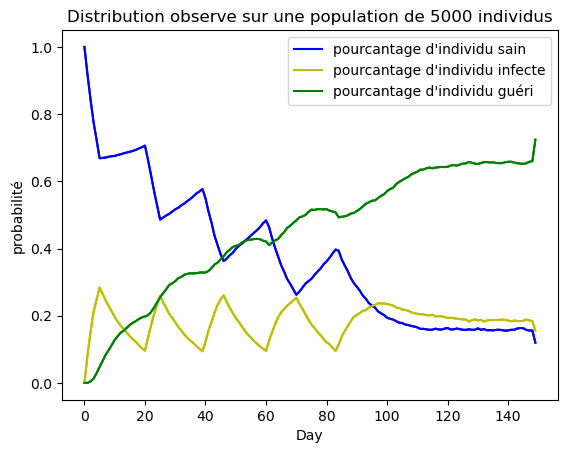

In [53]:
drawconEtnoncon(5000,150,A2)

### Question 3

Nous pouvons voir que d'ici 150 Days, nous avons besoin de 4 confinements et de 4 deconfinements, puis le nombre de personnes infectées se stabilisera et ne dépassera pas 25%

# 5. Discussion

Dans le premier modèle, il est évidemment irréaliste de reste se guérir et d'être immunisé face à la maladietout le temps. Le deuxième modèle est plus réaliste que le premier modèle, mais je pense que la probabilité de se remettre de la guérison et de retrouver la santé devrait être un peu augmentée.